In [1]:
import json
import os

In [2]:
MODELS = {
    "bilstm-10": "bilstm_model_results_10_Chexpert.json",
    "bilstm-50": "bilstm_model_results_50_Chexpert.json",
    "bilstm-100": "bilstm_model_results_100_Chexpert.json",
    "lstm-10": "lstm_model_results_10_Chexpert.json",
    "lstm-50": "lstm_model_results_50_Chexpert.json",
    "lstm-100": "lstm_model_results_100_Chexpert.json",
    "gpt-10": "gpt_model_results_10_Chexpert.json",
    "gpt-50": "gpt_model_results_50_Chexpert.json",
    "gpt-100": "gpt_model_results_100_Chexpert.json",
    "gpt2-10": "gpt2_model_results_10_Chexpert.json",
    "gpt2-50": "gpt2_model_results_50_Chexpert.json",
    "gpt2-100": "gpt2_model_results_100_Chexpert.json"
}
results = {}
for model_name, file_name in MODELS.items():
    with open(os.path.join("results", file_name), 'r') as f:
        results[model_name] = json.load(f)

In [3]:
# Plot barplot of results for each model for each metric
import matplotlib.pyplot as plt

metrics = list(next(iter(results.values())).keys())
metrics = [metric for metric in metrics if metric not in ["bertscore_f1", "rouge_l"]]

In [4]:
metrics

['chexbert_f1_weighted',
 'chexbert_f1_micro',
 'chexbert_f1_macro',
 'chexbert_f1_micro_5',
 'chexbert_f1_macro_5',
 'radgraph_f1_RG_E',
 'radgraph_f1_RG_ER',
 'training_time_seconds']

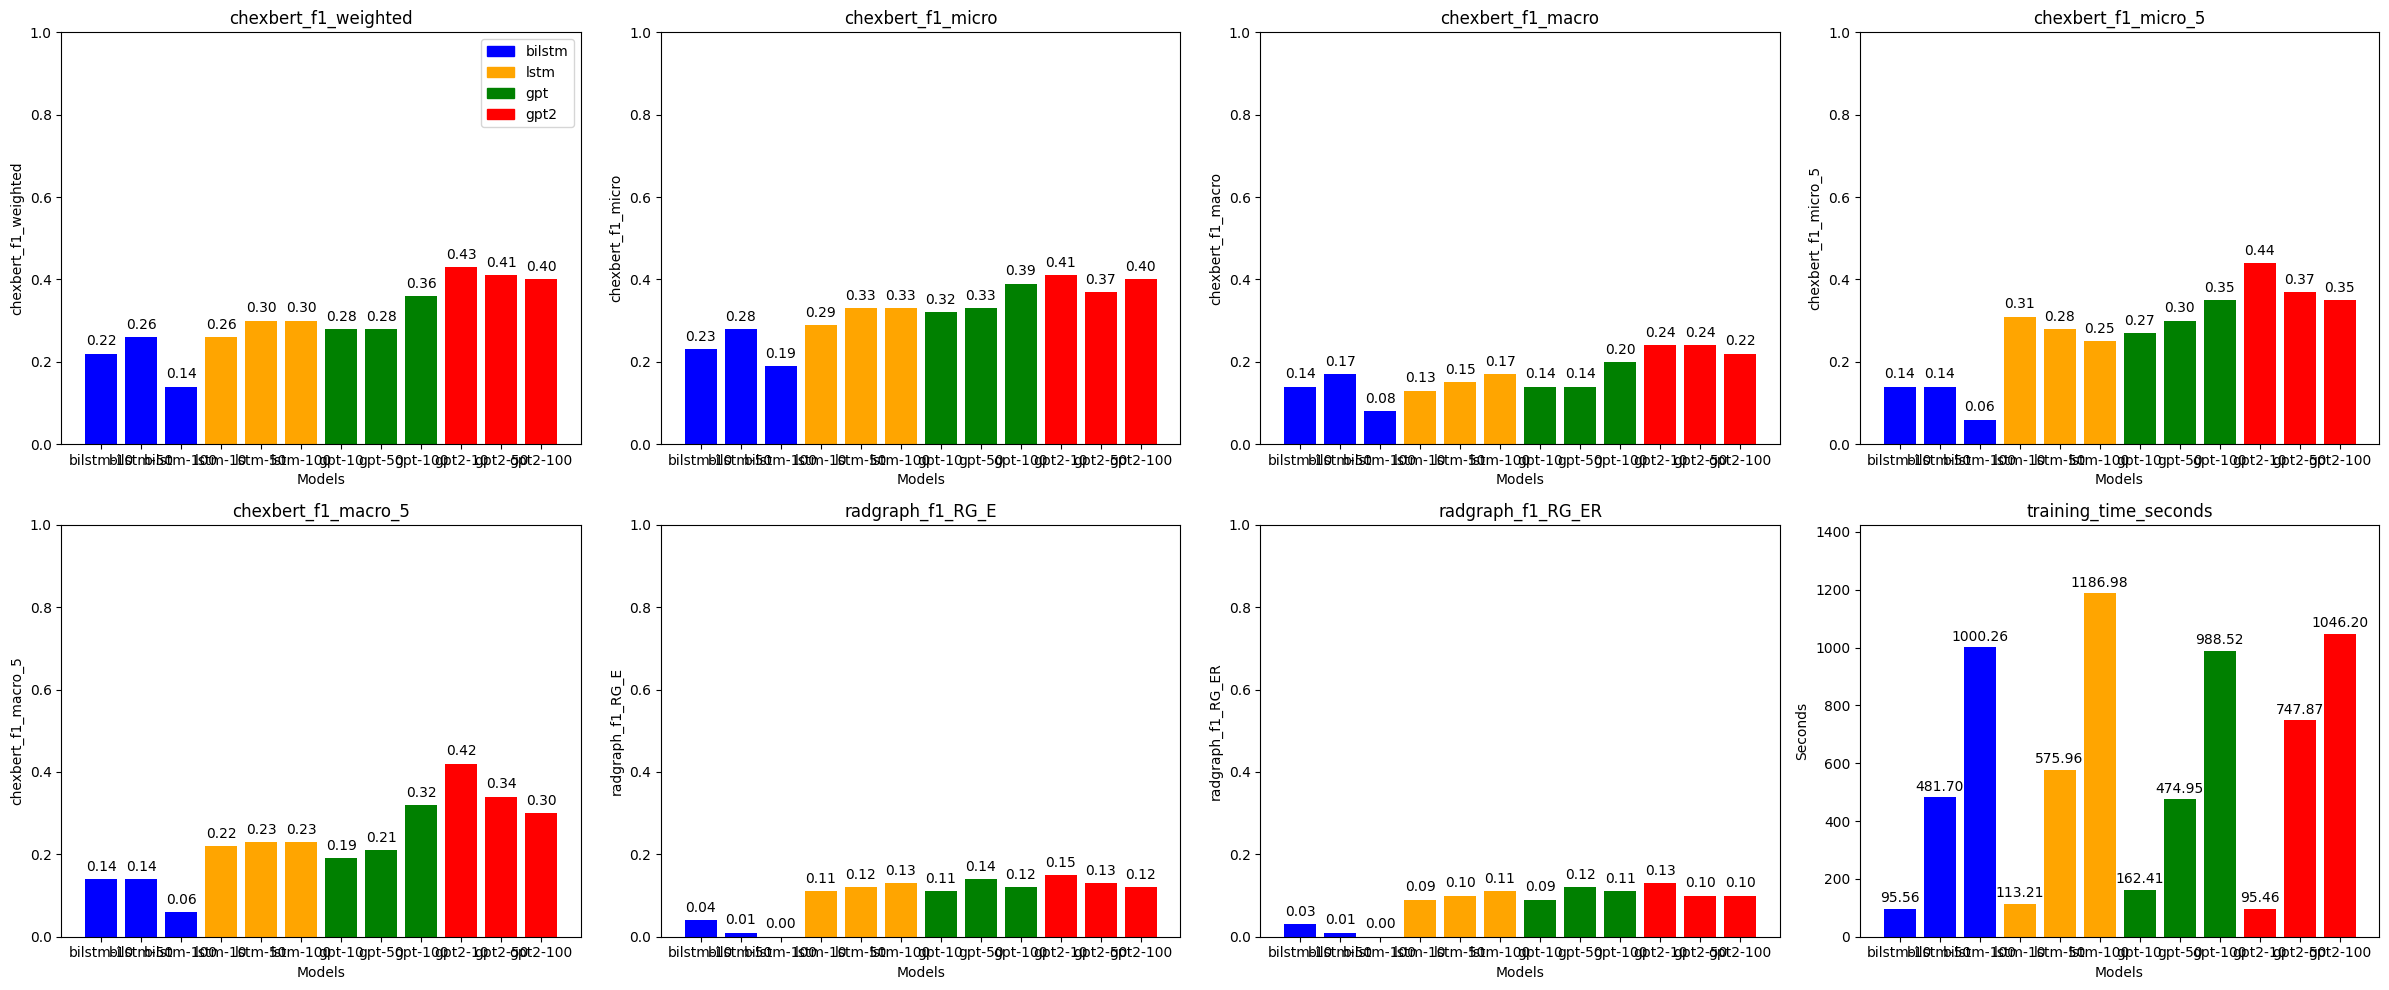

In [5]:
import matplotlib.pyplot as plt

base_colors = {
    'bilstm': 'blue',
    'lstm': 'orange',
    'gpt': 'green',
    'gpt2': 'red'
}

def get_base(model_name):
    return model_name.split('-')[0]

metrics = [
    'chexbert_f1_weighted', 'chexbert_f1_micro', 'chexbert_f1_macro',
    'chexbert_f1_micro_5', 'chexbert_f1_macro_5',
    'radgraph_f1_RG_E', 'radgraph_f1_RG_ER',
    'training_time_seconds'
]

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    raw_scores = [results[model][metric] for model in MODELS.keys()]
    scores = [round(score, 2) for score in raw_scores]
    colors = [base_colors[get_base(model)] for model in MODELS.keys()]

    ax = axes[idx]
    bars = ax.bar(list(MODELS.keys()), scores, color=colors)
    ax.set_title(metric)
    ax.set_xlabel('Models')
    ax.set_ylabel('Seconds' if metric == 'training_time_seconds' else metric)

    # Adjust y-axis for training time
    if metric == 'training_time_seconds':
        max_time = max(scores)
        ax.set_ylim(0, max_time * 1.2)
        offset = max_time * 0.02
    else:
        ax.set_ylim(0, 1)
        offset = 0.02

    for i, score in enumerate(scores):
        ax.text(i, score + offset, f'{score:.2f}', ha='center')

    if idx == 0:
        handles = [
            plt.Rectangle((0,0),1,1, color='blue', label='bilstm'),
            plt.Rectangle((0,0),1,1, color='orange', label='lstm'),
            plt.Rectangle((0,0),1,1, color='green', label='gpt'),
            plt.Rectangle((0,0),1,1, color='red', label='gpt2')
        ]
        ax.legend(handles=handles, loc='upper right')

# Hide any unused subplots (if fewer than 8 metrics)
for j in range(len(metrics), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()